# FIRST STEPS IN QISKIT

In this notebook, we are going to learn how to use Qiskit to define a simple circuit and to execute it on both simulators and the quantum computers of the IBM Quantum Experience.. 

We start by importing the necessary packages.

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

## Defining the circuit

Now, we are going to define a very simple circuit: we will use the $H$ gate to put a qubit in superposition and then we will measure it

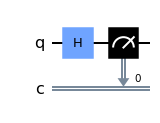

In [2]:
# Let's create a circuit to put a state in superposition and measure it

circ = QuantumCircuit(1,1) # We use one qubit and also one classical bit for the measure result 

circ.h(0) #We apply the H gate

circ.measure(range(1),range(1)) # We measure

circ.draw(output='mpl') #We draw the circuit

We can also very easily obtain the *qasm* code for the circuit.

In [ ]:
print(circ.qasm())

## Running the circuit on simulators

Once that we have defined the circuit, we can execute it on a simulator. 

{'0': 512, '1': 512}


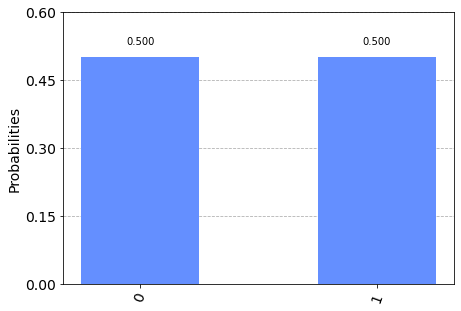

In [4]:
# Executing on the local simulator

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

We can also run the circuit run the circuit with a simulator that computes the final state. For that, we need to create a circuit with no measures 

In [5]:
# Execution to the get the statevector

circ2 = QuantumCircuit(1,1)

circ2.h(0)

backend = Aer.get_backend('statevector_simulator') # We change the backend

job = execute(circ2, backend) # We execute the circuit with the new simulator. Now, we do not need repetitions

result = job.result() # We collect the results and access the stavector 
outputstate = result.get_statevector(circ2)
print(outputstate)

[0.70710678+0.j 0.70710678+0.j]


Finally, we can also obtain the unitary matrix that represents the action of the circuit

In [6]:
backend = Aer.get_backend('unitary_simulator') # We change the backend again

job = execute(circ2, backend) # We execute the circuit

result = job.result() # We collect the results and obtain the matrix
unitary = result.get_unitary()
print(unitary)


[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


Now, we are going to use the quantum computers at the IBM Quantum Experience to use our circuit 

In [7]:
# Connecting to the real quantum computers

provider = IBMQ.load_account() # We load our account 
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'ibmqx2', 'backend_version': '2.2.5', 'operational': True, 'pending_jobs': 6, 'status_msg': 'active'}
{'backend_name': 'ibmq_16_melbourne', 'backend_version': '2.3.3', 'operational': True, 'pending_jobs': 3104, 'status_msg': 'active'}
{'backend_name': 'ibmq_vigo', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibmq_ourense', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibmq_valencia', 'backend_version': '1.4.3', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '1.1.3', 'operational': True, 'pending_jobs': 6, 'status_msg': 'active'}
{'backend_name': 'ibmq_athens', 'backend_version': '1.3.1', 'operational': True, 'pending_jobs': 4, 'status_msg': 'ac

We can execute the circuit on IBM's quantum simulator (supports up to 32 qubits). We only need to select the appropriate backend.

{'0': 503, '1': 521}


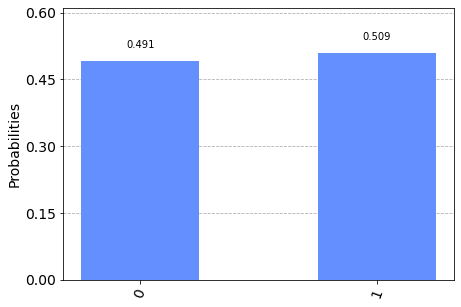

In [8]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

To execute on one of the real quantum computers, we only need to select it as backend. We will use *job_monitor* to have live information on the job status 

In [ ]:
# Executing on the quantum computer

backend = provider.get_backend('ibmq_armonk')

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

When the job is done, we can collect the results and compare them to the ones obtaine with the simulator

In [ ]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])